<a href="https://colab.research.google.com/github/ArturoSirvent/TFG_notebooks/blob/main/single_input/correlaciones_energia_core_angulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No sé si he entendido muy bien los resultados de Arturo. Pero vamos a
ver la página 16.  Sería interesante mirar los otros 10 telescopios
LST, a ver si pasa lo mismo.

¿Eso se pasa por todas las energías ?

Si para todos los 11 telescopios LST, tenemos la figura centrada creo
que puede que sea algún sesgo de la simulación.
Para eso tenemos que mirar dos cosas:
- primero la distancia del core al centro del telescopio. Esta
información está en los archivos gamma_tel_x_run_xx.txt; en todas
las líneas que empiezan con "@+"  en la columna 4. Para extraer esta
información uso un comando en shellscript muy sencillo: grep '@+'
gawk gamma_tel_1_run_01.txt |gawk '{print $2"  "$5}', por ejemplo.
Lo importante aquí es mirar si con el cambio de la distancia se
cambian la posición de las figuras. Puede que sea que los 100m que he
puesto de rango no están bien.

- segundo es el ángulo phi. La información está en la columna 16.
Podemos hacer la misma comparación de arriba.

Eso es lo que consigo pensar por ahora.


creo que es /media/Storage2/CTA/SimTelArray_release_2016_11_23/Data/sim_telarray/cta-ultra6/0.0deg/Data/data_2020_09


# Tenemos que mirar las siguientes cosas.
* los otros 10 telescopios grandes (si hay tiempo y ganas)
* Buscar la **correlación también con las energias**. Pasa para todas las energias?

* Mirar la distancia al core (ha puesto de rango 100 metros). Mirar si cambia la posicion segun el core. O que pasa. **Buscar correlación entre posicion y distancia a core**. Dice que eso esta en la columna 4.
* El angulo phi (dice que está en la columna 16 pero no se yo... Dice el ángulo phi, pero eso me cuadra mas que sen las columnas 11,12 o 13). Buscar una correlación entre el angulo phi y la posicion de los centros.

### Lo primero que tendremos que hacer es determinar de alguna manera el centro de incidencia y las posibles discrepancias con ellos.
Formas posibles:
* Poner el centro como origen y calcular la distancia euclidea a ese centro, el máximo de intensidad. Como si tubieramos un valle 2D y queremos determinar la distancia de el máximo al centro.
* **Tomar grupos segun intensidades o distancias al core etc y hacer lo mismito, solo que con esos grupos de datos. Y ver si al agruparlos de esta forma la cosa es diferente.**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import re
from scipy.optimize import curve_fit


In [ ]:
ground_dir="/content/drive/MyDrive/TFG arturo"
dt_dir="/content/drive/MyDrive/TFG arturo/gamma/gamma_dt"
txt_dir="/content/drive/MyDrive/TFG arturo/gamma_txt"
resultados_dir="/content/drive/MyDrive/TFG arturo/correlaciones_energia_core"
agrupacion_npy_energia="/content/drive/MyDrive/TFG arturo/correlaciones_energia_core/npy_energia"
agrupacion_graph_energia="/content/drive/MyDrive/TFG arturo/correlaciones_energia_core/graphs_por_RUN"

In [ ]:
archivos_dt=os.listdir(dt_dir)
archivos_txt=os.listdir(txt_dir)

In [ ]:
print(len(archivos_dt),len(archivos_txt))

41 41


In [ ]:
def exp_fit(x,tau,C):
  return np.exp(-x/tau)*C

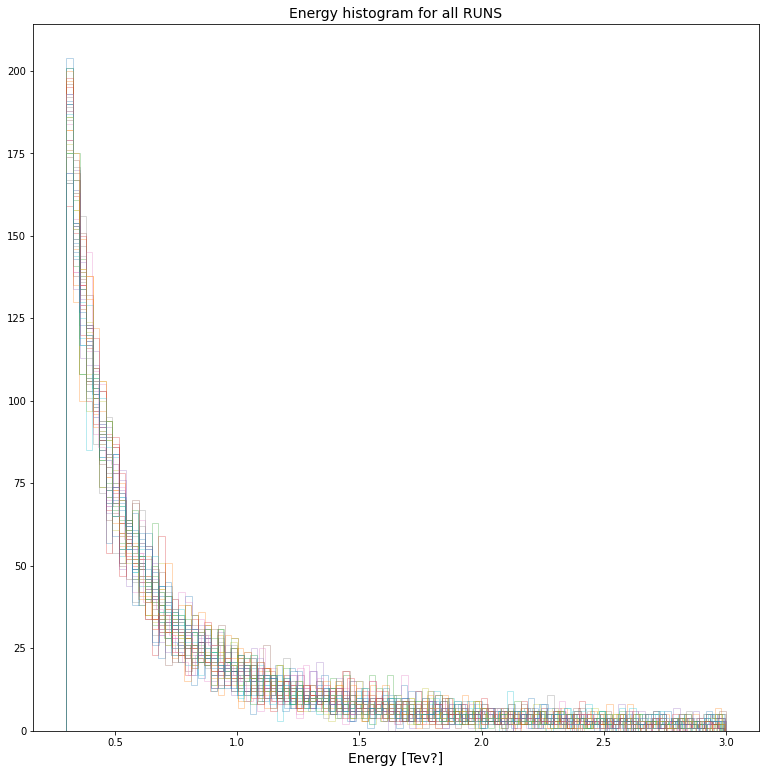

In [ ]:
#lo primero de todo es un estudio de las energias y de las distancias a los cores de las simulaciones
#vamos a recorrer las 41 RUNS y vamos a representar las energias
ajustes=[]
plt.figure(figsize=(13,13))
for nombre in archivos_txt:
  dir_aux=os.path.join(txt_dir,nombre)
  with open(dir_aux,"r") as file:
    text_aux=file.read()

  a=re.findall(r'@\+[\s\d.-]*\d',text_aux)
  a=[i.replace("@+ ","").split() for i in a]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  a=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in a]
  energias=[i[1] for i in a]
  dist_core=[i[2] for i in a]
  hist_aux=plt.hist(energias,100,histtype='step', alpha=0.3)
  x=hist_aux[1][1:]
  y=hist_aux[0]
  #hacemos un ajuste para ver si todas tienen mas o menos el mismo parametro. Esto es una
  #exponencial pero del tiron vaya C*exp{-x/tau}
  ajuste_aux,_=curve_fit(exp_fit,x,y)
  ajustes.append(ajuste_aux)
ajustes=np.array(ajustes)
plt.title("Energy histogram for all RUNS",fontsize=14)
plt.xlabel("Energy [Tev?]",fontsize=14)
plt.savefig(resultados_dir+"/todas_energias.png")


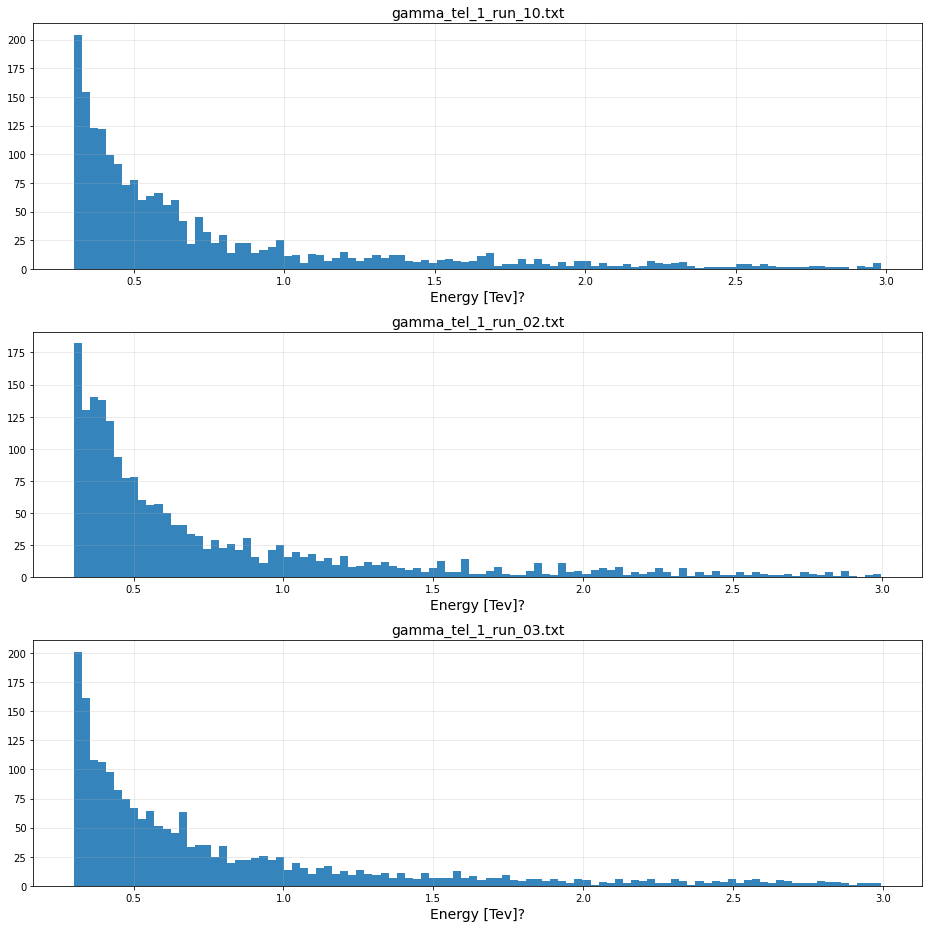

In [ ]:
#lo primero de todo es un estudio de las energias y de las distancias a los cores de las simulaciones
#vamos a recorrer las 41 RUNS y vamos a representar las energias
ajustes=[]
plt.figure(figsize=(13,13))
figura=1
for nombre in archivos_txt[:3]:
  dir_aux=os.path.join(txt_dir,nombre)
  with open(dir_aux,"r") as file:
    text_aux=file.read()


  a=re.findall(r'@\+[\s\d.-]*\d',text_aux)
  a=[i.replace("@+ ","").split() for i in a]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  a=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in a]
  energias=[i[1] for i in a]
  dist_core=[i[2] for i in a]
  plt.subplot(3,1,figura)
  figura+=1
  plt.grid(alpha=0.3)
  hist_aux=plt.hist(energias,100,histtype='stepfilled', alpha=0.9)
  plt.xlabel("Energy [Tev]?",fontsize=14)
  plt.title(nombre,fontsize=14)
  x=hist_aux[1][1:]
  y=hist_aux[0]
  #hacemos un ajuste para ver si todas tienen mas o menos el mismo parametro. Esto es una
  #exponencial pero del tiron vaya C*exp{-x/tau}
  ajuste_aux,_=curve_fit(exp_fit,x,y)
  ajustes.append(ajuste_aux)
plt.tight_layout()
ajustes=np.array(ajustes)
plt.savefig(resultados_dir+"/energia_plot1.png")

In [ ]:
print("Tau has a mean value of "+str(round(np.mean(ajustes[:,0]),3))+" with a standard deviation of +- "+str(round(np.std(ajustes[:,0]),3)))

print("C has a mean value of "+str(round(np.mean(ajustes[:,1]),3))+" with a standard deviation of +- "+str(round(np.std(ajustes[:,1]),3)))

Tau has a mean value of 0.264 with a standard deviation of +- 0.015
C has a mean value of 569.268 with a standard deviation of +- 61.785


In [ ]:
print("El ajuste es f(x)=C*e^{-x/tau}")
print("Tau tiene un valor medio de "+str(round(np.mean(ajustes[:,0]),3))+" con una desviación estandar de +- "+str(round(np.std(ajustes[:,0]),3)))

print("C tiene un valor medio de "+str(round(np.mean(ajustes[:,1]),3))+" con una desviación estandar de +- "+str(round(np.std(ajustes[:,1]),3)))

El ajuste es f(x)=C*e^{-x/tau}
Tau tiene un valor medio de 0.264 con una desviación estandar de +- 0.015
C tiene un valor medio de 569.268 con una desviación estandar de +- 61.785


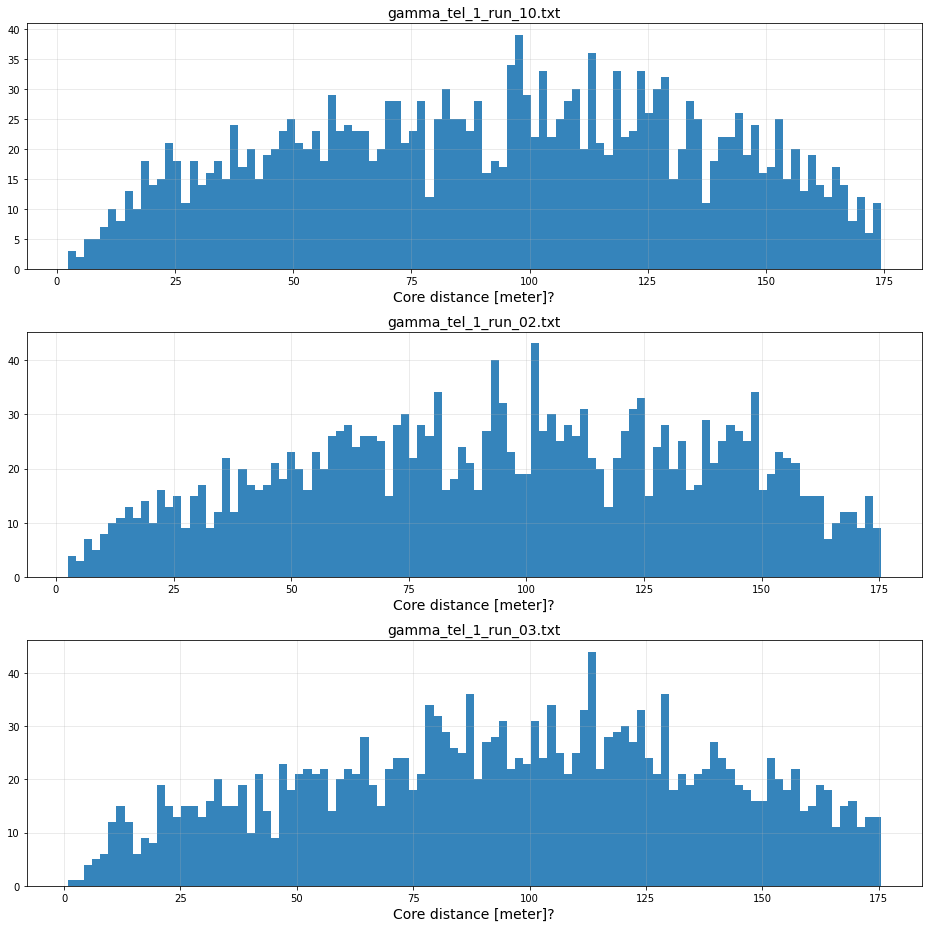

In [ ]:
#lo primero de todo es un estudio de las energias y de las distancias a los cores de las simulaciones
#vamos a recorrer las 41 RUNS y vamos a representar las energias
ajustes=[]
plt.figure(figsize=(13,13))
figura=1
for nombre in archivos_txt[:3]:
  dir_aux=os.path.join(txt_dir,nombre)
  with open(dir_aux,"r") as file:
    text_aux=file.read()


  a=re.findall(r'@\+[\s\d.-]*\d',text_aux)
  a=[i.replace("@+ ","").split() for i in a]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  a=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in a]
  energias=[i[1] for i in a]
  dist_core=[i[2] for i in a]
  plt.subplot(3,1,figura)
  figura+=1
  plt.grid(alpha=0.3)
  hist_aux=plt.hist(dist_core,100,histtype='stepfilled', alpha=0.9)
  plt.xlabel("Core distance [meter]?",fontsize=14)
  plt.title(nombre,fontsize=14)

plt.tight_layout()
plt.savefig(resultados_dir+"/core_plot1.png")

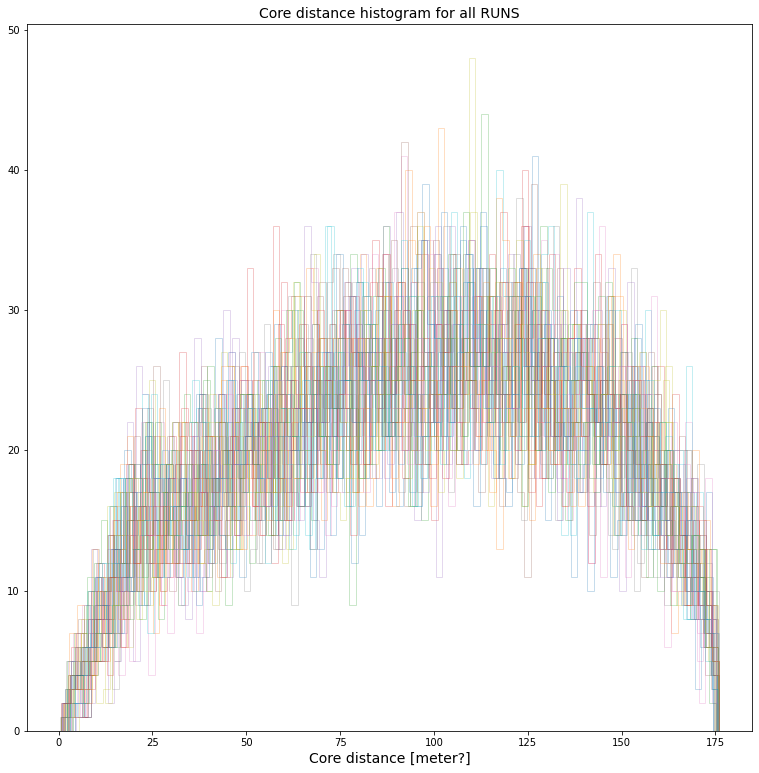

In [ ]:
#lo primero de todo es un estudio de las energias y de las distancias a los cores de las simulaciones
#vamos a recorrer las 41 RUNS y vamos a representar las energias
ajustes=[]
plt.figure(figsize=(13,13))
for nombre in archivos_txt:
  dir_aux=os.path.join(txt_dir,nombre)
  with open(dir_aux,"r") as file:
    text_aux=file.read()

  a=re.findall(r'@\+[\s\d.-]*\d',text_aux)
  a=[i.replace("@+ ","").split() for i in a]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  a=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in a]
  energias=[i[1] for i in a]
  dist_core=[i[2] for i in a]
  hist_aux=plt.hist(dist_core,100,histtype='step', alpha=0.25)

  #hacemos un ajuste para ver si todas tienen mas o menos el mismo parametro. Esto es una
  #exponencial pero del tiron vaya C*exp{-x/tau}

plt.title("Core distance histogram for all RUNS",fontsize=14)
plt.xlabel("Core distance [meter?]",fontsize=14)
plt.savefig(resultados_dir+"/todas_coredistance.png")


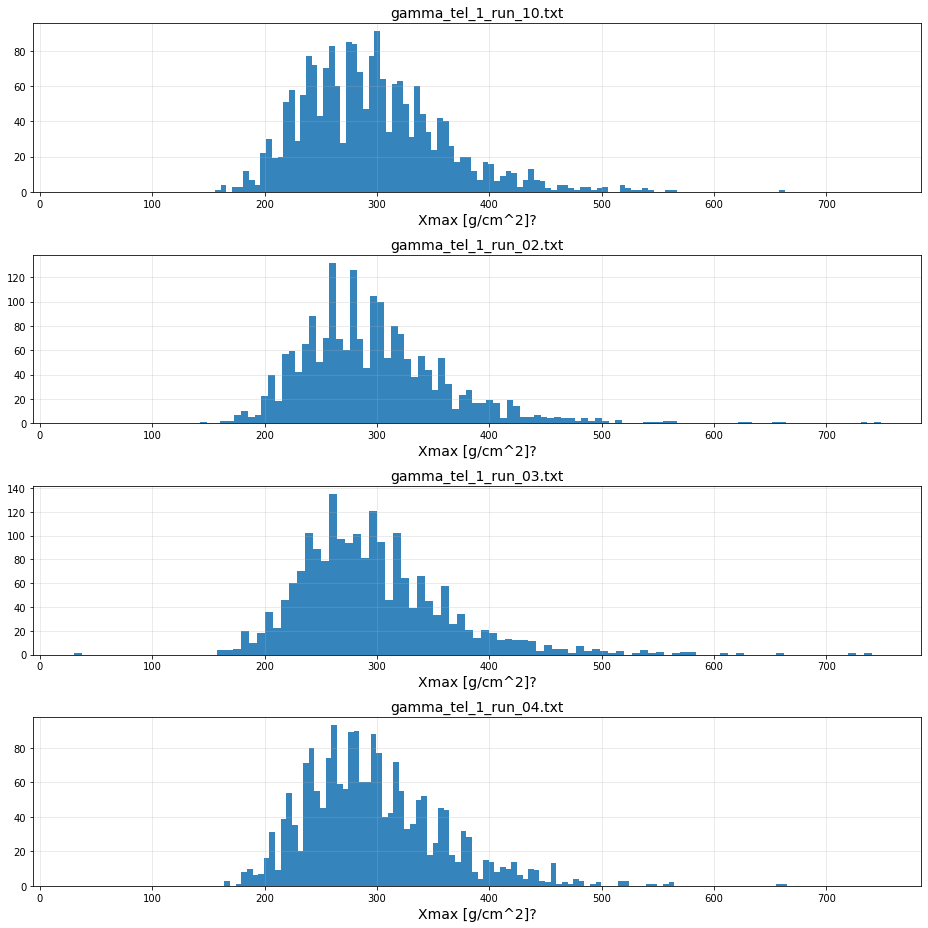

In [ ]:
#lo primero de todo es un estudio de las energias y de las distancias a los cores de las simulaciones
#vamos a recorrer las 41 RUNS y vamos a representar las energias
ajustes=[]
plt.figure(figsize=(13,13))
figura=1
for nombre in archivos_txt[:4]:
  dir_aux=os.path.join(txt_dir,nombre)
  with open(dir_aux,"r") as file:
    text_aux=file.read()


  a=re.findall(r'@\+[\s\d.-]*\d',text_aux)
  a=[i.replace("@+ ","").split() for i in a]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  a=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in a]
  energias=[i[1] for i in a]
  phi=[i[3] for i in a]
  plt.subplot(4,1,figura,sharex=plt.gca())
  figura+=1
  plt.grid(alpha=0.3)
  hist_aux=plt.hist(phi,100,histtype='stepfilled', alpha=0.9)
  plt.xlabel("Xmax [g/cm^2]?",fontsize=14)
  plt.title(nombre,fontsize=14)

plt.tight_layout()
plt.savefig(resultados_dir+"/phi_plot1.png")

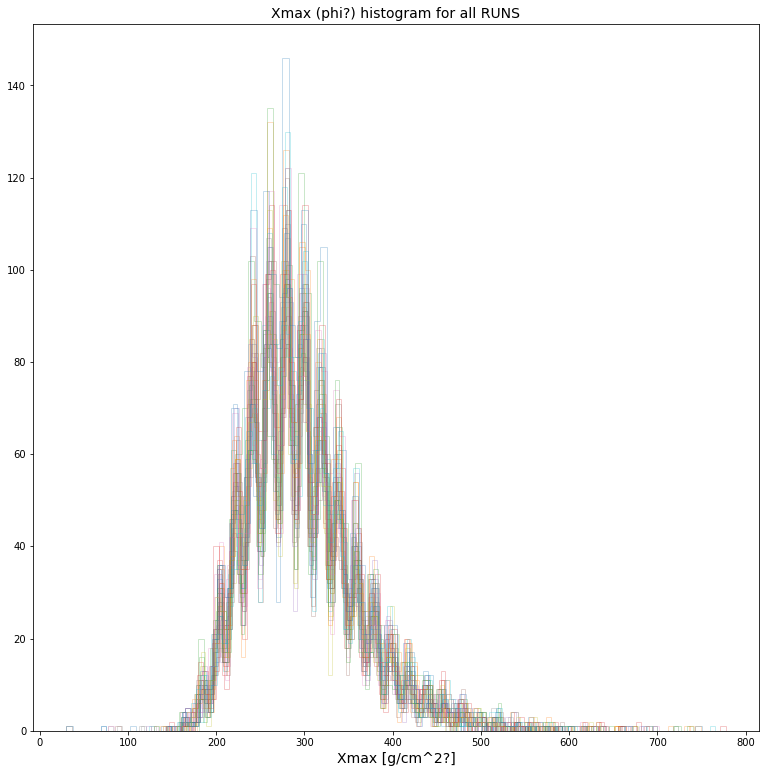

In [ ]:
#lo primero de todo es un estudio de las energias y de las distancias a los cores de las simulaciones
#vamos a recorrer las 41 RUNS y vamos a representar las energias
ajustes=[]
plt.figure(figsize=(13,13))
for nombre in archivos_txt:
  dir_aux=os.path.join(txt_dir,nombre)
  with open(dir_aux,"r") as file:
    text_aux=file.read()

  a=re.findall(r'@\+[\s\d.-]*\d',text_aux)
  a=[i.replace("@+ ","").split() for i in a]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  a=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in a]
  phi=[i[3] for i in a]
  hist_aux=plt.hist(phi,100,histtype='step', alpha=0.25)

  #hacemos un ajuste para ver si todas tienen mas o menos el mismo parametro. Esto es una
  #exponencial pero del tiron vaya C*exp{-x/tau}

plt.title("Xmax (phi?) histogram for all RUNS",fontsize=14)
plt.xlabel("Xmax [g/cm^2?]",fontsize=14)
plt.savefig(resultados_dir+"/todas_phi.png")


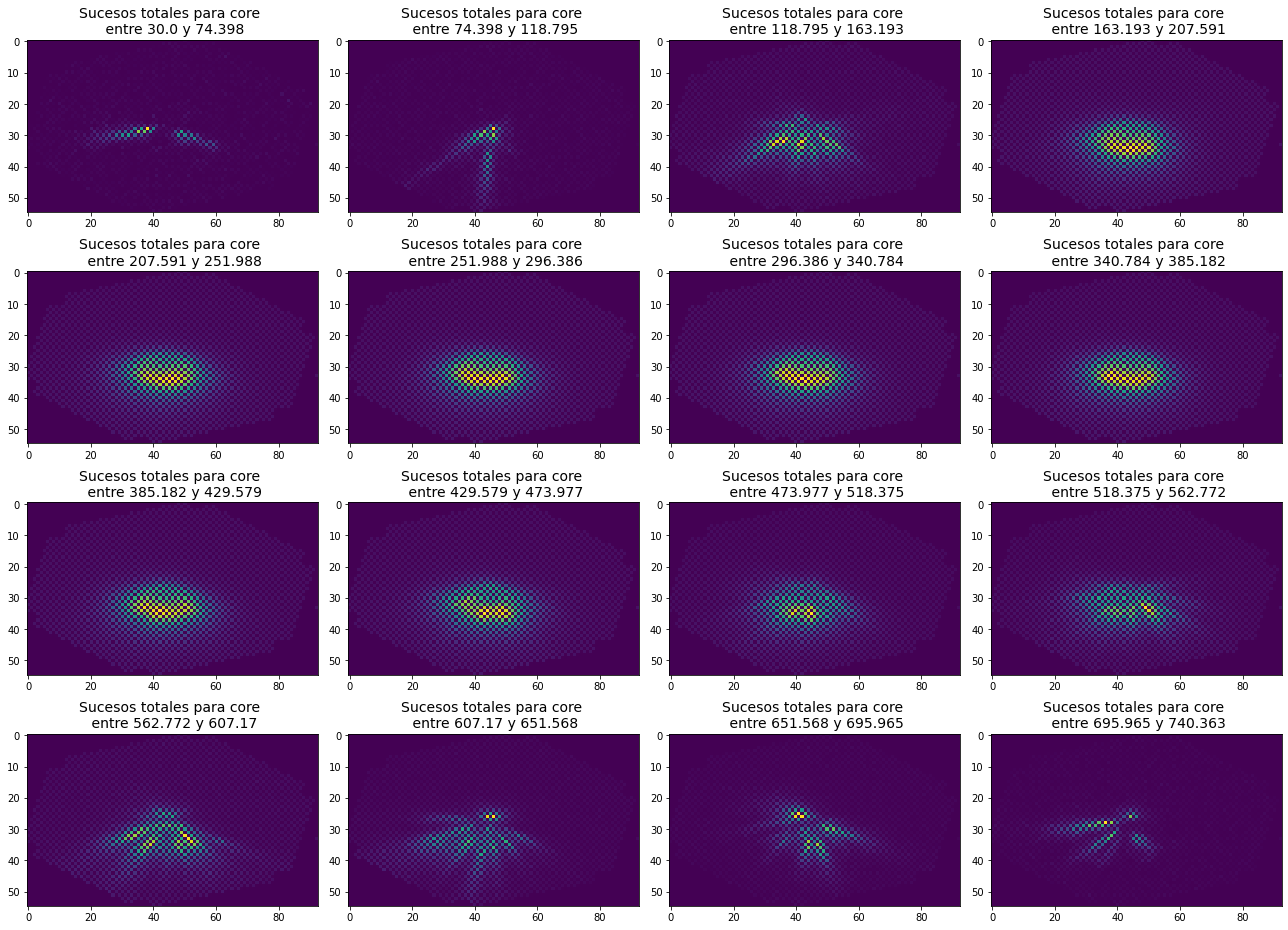

In [ ]:
#ahora voy a poner un intervalo para las energias y segun si un proceso ocurre en ese intervalo, lo incluyo en una lista
#ese intervalo de energías lo obtenemos de hacer histogram con los datos de TODAS LAS RUNS.
#VAMOS A JUNTAR RUNS PUES SUPONEMOS QUE EL ERROR NO ESTAN EN NINGUNA DE ELLAS EN CONCRETO

ground_dir="/content/drive/MyDrive/TFG arturo"
dt_dir="/content/drive/MyDrive/TFG arturo/gamma/gamma_dt"
txt_dir="/content/drive/MyDrive/TFG arturo/gamma_txt"
resultados_dir="/content/drive/MyDrive/TFG arturo/correlaciones_energia_core"
agrupacion_npy_energia="/content/drive/MyDrive/TFG arturo/correlaciones_energia_core/npy_phi"
agrupacion_graph_energia="/content/drive/MyDrive/TFG arturo/correlaciones_energia_core/graphs_phi_por_RUN"

archivos_dt=os.listdir(dt_dir)
archivos_txt=os.listdir(txt_dir)
primero=True
#toda la clasificacion de energias se hara segun limites en un numero determinado de intervalos
n_of_bins=16 #porque si, porque lo digo yo
#ahora creamos un array para ir llenandolo con los valores del evento que encaja ahí
#seguro que con esto tendremos problemas de memoria

#valores de las posiciones de los pixeles
y=[32, 33, 31,  0, 30, 34, 29, 35, 28, 36, 27, 37, 26, 38, 25, 39, 24,40, 23, 41,
   22, 21, 20, 42, 43, 44, 19, 18, 45, 46, 17, 16, 47, 48,15, 14, 49, 50, 13, 12,
   51, 52, 11, 10, 53, 54,  9,  8, 55, 56, 7,6, 57, 58,  5, 59]
x=[ 84,  82,  83,  85,  86,   0,  89,  87,  88,  90,  91,  79,  77, 78,  80,  81,
   94,  92,  95,  96,  93,  74,  72,  73,  75,  76, 99,  97,  98, 100, 101,  69,
   67,  68,  70,  71, 104, 102, 103,105, 106,  64,  62,  63,  65,  66, 109, 107,
   108, 110, 111,  59, 57,  58,  60,  61, 114, 112, 113, 115, 116,  54,  52,  53,
   55, 56, 119, 117, 118, 120, 121,  49,  47,  48,  50,  51, 123, 125,126,  44,
   42,  43,  45, 122, 124, 127,  46,  40,  38,  39,  41,128, 129, 130]

RUN=1
clasificacion_sumatotal=[ np.zeros((60-5,131-38)) for i in range(n_of_bins)]

for dt,txt in zip(archivos_dt,archivos_txt):
  clasificacion=[ np.zeros((60-5,131-38)) for i in range(n_of_bins)]
  #vamos a extraer la informacion de cada una de las runs a la vez 
  #y vamos a unir la agrupar segun la energia los eventos
  dt_file=os.path.join(dt_dir,dt)
  dt_data=pd.read_csv(dt_file,sep='  ',names=["1","2","3","4","5","6"],engine="python")
  #procesamos los valores y despues clasificamos
  dt_data=dt_data[['1','3','4','5']].copy()
  dt_data.loc[dt_data["5"]<0]=0
  max_aux=np.amax(dt_data["5"])
  dt_data["5"]=dt_data["5"]/max_aux
  x_minimo=min(dt_data['3'])
  y_minimo=min(dt_data['4'])
  dt_data['3']=dt_data['3'].apply(lambda x: round((x-x_minimo)/333))
  dt_data['4']=dt_data['4'].apply(lambda x: round((x-y_minimo)/192))

  with open(os.path.join(txt_dir,txt)) as txt_file:
    txt_data=txt_file.read()

  txt_data=re.findall(r'@\+[\s\d.-]*\d',txt_data)
  txt_data=[i.replace("@+ ","").split() for i in txt_data]
  #primero el evento, segundo la energia, tercero distancia al core, cuarto el angulo (este puede estar mal)
  txt_data=[[float(i[0]),float(i[2]),float(i[3]),float(i[15])] for i in txt_data]
  energias=np.array([np.array([i[0],i[3]]) for i in txt_data])#realmente ahoral o hacemos para el core
  #esto lo vamos a hacer para el primero
  if (primero==True):
    #con esto estamos haciendo la suposicion de que mas o menos todas las energias tienen el mismo rango y con esto podemos clasificar casi todo
    #esta creencia esta fundamentada por la representacion que vemos de todas las runs, que son casi iguales las energias.
    primero=False
    ordenacion=np.histogram(energias[:,1],bins=n_of_bins)
    #plt.hist([i[1] for i in energias],30);
    edges=ordenacion[1]
  #ahora vamos a ordenar segun los edges
  #for num_evento, val_energia in energias:
  #tenemos que ver en que intervalo está la energia de este evento
  #creo que esto con histogram se puede hacer muy facil
  for i in range(n_of_bins):
    minim=edges[i]
    maxim=edges[i+1]
    #ahora vemos cuales de los eventos estan entre estas energias
    eventos_aux=energias[:,0][(energias[:,1]>minim) & (energias[:,1]<maxim) ]
    #ahora tenemos que meter esos eventos en el array clasificación
    for event in eventos_aux:
      #ahora vamos a crear una imagen
      matrix_aux=np.zeros((60-5,131-38))
      data_aux=dt_data[dt_data["1"]==event][["3","4","5"]]
      matrix_aux[data_aux["3"].to_numpy()-5,data_aux["4"].to_numpy()-39]=data_aux["5"].to_numpy()
      #clasificacion[i].append(matrix_aux)
      clasificacion[i]+=matrix_aux
      clasificacion_sumatotal[i]+=matrix_aux
  #ya tenemos clasificacion que es una lista con todos los eventos clasificados segun energias
  #SEGUIMOS EN CADA UNA DE LAS RUNS, ahora vamos a hacer varias cosas, para todas las run, para cada una ...
  #primero de nada vamos a guardar los datos
  #guardamos los limites de energia y guardamos las imagenes de eventos en dichos intervalos
  #agrupacion_npy_energia
  np.save(agrupacion_npy_energia+"/intervalos_de_phi_RUN_"+str(RUN)+".npy",edges)
  np.save(agrupacion_npy_energia+"/sucesos_RUN_"+str(RUN)+"_"+str(n_of_bins)+"_bins.npy",np.array(clasificacion))

  plt.figure(figsize=(18,13))
  for i in range(len(clasificacion)):
    #esto depende el numero de bins, se han tomado 16 para que sea 4 y 4
    plt.subplot(4,4,i+1)
    plt.title("Sucesos de la RUN "+str(RUN)+" para phi \n entre "+str(round(edges[i],3))+" y "+str(round(edges[i+1],3)),fontsize=14)
    sum_final=clasificacion[i]
    plt.imshow(sum_final)
  plt.tight_layout()
  dir_graph=os.path.join(agrupacion_graph_energia,"phi_RUN_"+str(RUN)+".png")
  plt.savefig(dir_graph)
  plt.close()
  RUN+=1


np.save(agrupacion_npy_energia+"/sucesos_total_"+str(n_of_bins)+"_bins_phi.npy",np.array(clasificacion_sumatotal))

plt.figure(figsize=(18,13))
for i in range(len(clasificacion_sumatotal)):
  #esto depende el numero de bins, se han tomado 9 para que sea 3 y 3
  plt.subplot(4,4,i+1)
  plt.title("Sucesos totales para core \n entre "+str(round(edges[i],3))+" y "+str(round(edges[i+1],3)),fontsize=14)
  sum_final=clasificacion_sumatotal[i]
  plt.imshow(sum_final)
plt.tight_layout()
dir_graph=os.path.join(agrupacion_graph_energia,"TOTAL_phi.png")
plt.savefig(dir_graph)



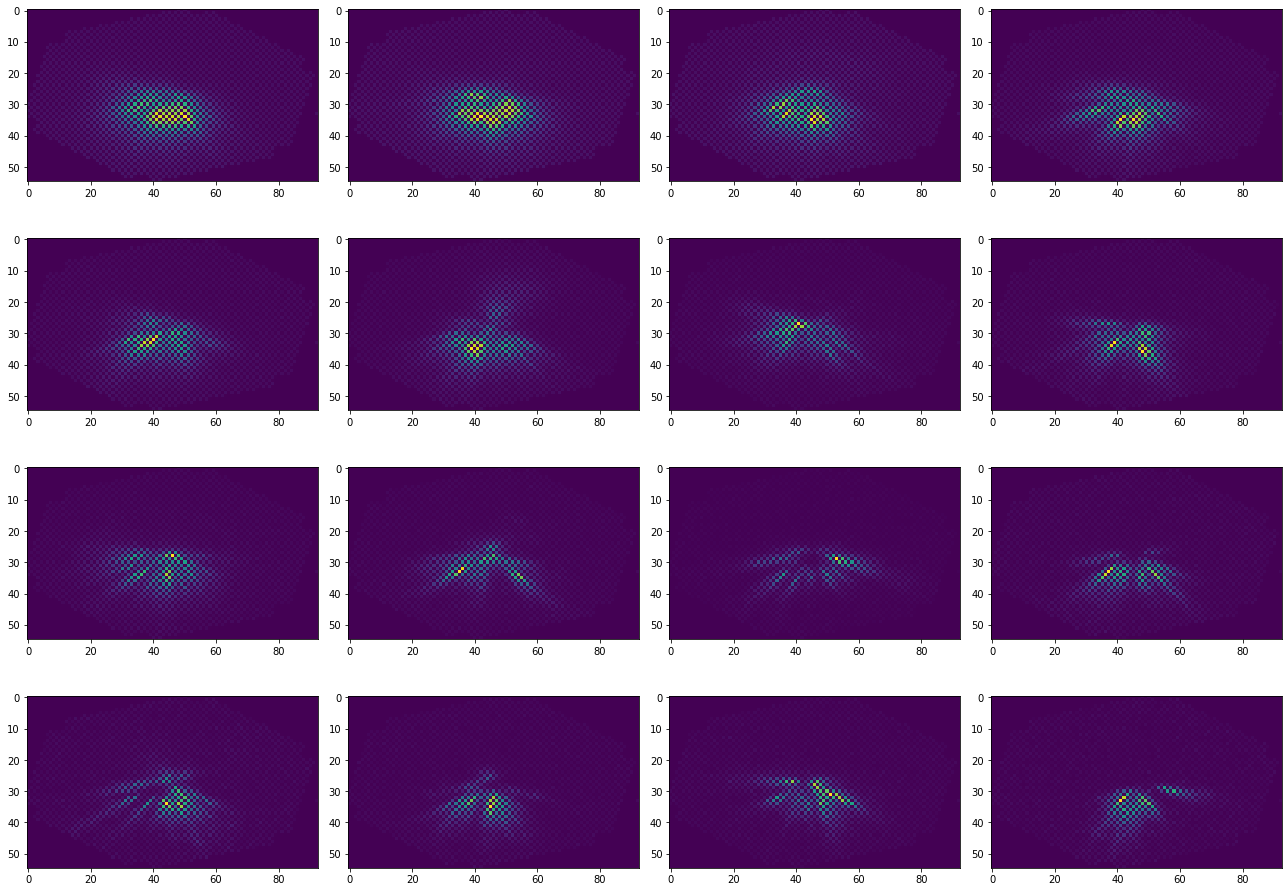

In [ ]:
sum_final=[]
plt.figure(figsize=(18,13))
for i in range(len(clasificacion)):
  plt.subplot(4,4,i+1)
  sum_final.append(sum(clasificacion[i][:]))
  plt.imshow(sum_final[i])
plt.tight_layout()

In [ ]:
y=[32, 33, 31,  0, 30, 34, 29, 35, 28, 36, 27, 37, 26, 38, 25, 39, 24,40, 23, 41,
   22, 21, 20, 42, 43, 44, 19, 18, 45, 46, 17, 16, 47, 48,15, 14, 49, 50, 13, 12,
   51, 52, 11, 10, 53, 54,  9,  8, 55, 56, 7,6, 57, 58,  5, 59]
x=[ 84,  82,  83,  85,  86,   0,  89,  87,  88,  90,  91,  79,  77, 78,  80,  81,
   94,  92,  95,  96,  93,  74,  72,  73,  75,  76, 99,  97,  98, 100, 101,  69,
   67,  68,  70,  71, 104, 102, 103,105, 106,  64,  62,  63,  65,  66, 109, 107,
   108, 110, 111,  59, 57,  58,  60,  61, 114, 112, 113, 115, 116,  54,  52,  53,
   55, 56, 119, 117, 118, 120, 121,  49,  47,  48,  50,  51, 123, 125,126,  44,
   42,  43,  45, 122, 124, 127,  46,  40,  38,  39,  41,128, 129, 130]

ValueError: ignored

In [ ]:
b

array([ True, False, False, ...,  True,  True, False])

In [ ]:
clasificacion=[[] for i in range(n_of_bins)]


In [ ]:
clasificacion[1].append([1,2,3])

[[],
 [[1, 2, 3]],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [ ]:
for i in range(2,12):
  print("\\begin{figure}[h] \n \centering \n \includegraphics[width=0.4\linewidth]{tel_rev/telescopio_"+str(i)+"_todas_RUNS.png}\n \caption{Sum of intensities for all the random picked RUNS in telescope "+str(i)+"} \n \end{figure} \n ")




\begin{figure}[h] 
 \centering 
 \includegraphics[width=0.4\linewidth]{tel_rev/telescopio_2_todas_RUNS.png}
 \caption{Sum of intensities for all the random picked RUNS in telescope 2} 
 \end{figure} 
 
\begin{figure}[h] 
 \centering 
 \includegraphics[width=0.4\linewidth]{tel_rev/telescopio_3_todas_RUNS.png}
 \caption{Sum of intensities for all the random picked RUNS in telescope 3} 
 \end{figure} 
 
\begin{figure}[h] 
 \centering 
 \includegraphics[width=0.4\linewidth]{tel_rev/telescopio_4_todas_RUNS.png}
 \caption{Sum of intensities for all the random picked RUNS in telescope 4} 
 \end{figure} 
 
\begin{figure}[h] 
 \centering 
 \includegraphics[width=0.4\linewidth]{tel_rev/telescopio_5_todas_RUNS.png}
 \caption{Sum of intensities for all the random picked RUNS in telescope 5} 
 \end{figure} 
 
\begin{figure}[h] 
 \centering 
 \includegraphics[width=0.4\linewidth]{tel_rev/telescopio_6_todas_RUNS.png}
 \caption{Sum of intensities for all the random picked RUNS in telescope 6} 
 \end{f